In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pick


### Load Data

In [2]:
# importing data
DataFrame=pd.read_csv("mushrooms.csv")

In [3]:
DataFrame.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### EDA

In [4]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
Column=DataFrame.columns

In [6]:
DataFrame.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [7]:
len(Column)
Column[0]

'class'

c:\Users\Keerththanan\MYPROGRAM\Annaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


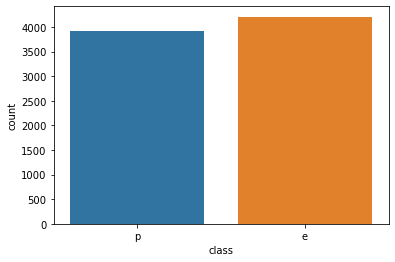

In [8]:
sns.countplot(DataFrame['class'])
plt.show()

        conclusion- approximately target variable has balance data

### Feature Selection  (Chi-Square Test of Independence)

In [9]:
import scipy

In [10]:
def chiTest(col):
    H0=f"There is no relationship between class and {col} variable"
    H1=f"There is a relationship between class and {col} variable"
    alpha=0.05
    table=pd.crosstab(DataFrame[col],DataFrame['class'],rownames=[col],colnames=['class'])
    test_statistic,p_value,dof,expectedValue=scipy.stats.chi2_contingency(table)
    print("\n")
    if p_value<alpha:
        print("There is a enough evidence to reject null hypothesis")
        print(H1)
    else:
        print("There is no enough evidence to reject null hypothesis")
        print(H0)
    return p_value
        

In [11]:
selectedCol = [c for c in Column if float(chiTest(c))<0.05]



There is a enough evidence to reject null hypothesis
There is a relationship between class and class variable


There is a enough evidence to reject null hypothesis
There is a relationship between class and cap-shape variable


There is a enough evidence to reject null hypothesis
There is a relationship between class and cap-surface variable


There is a enough evidence to reject null hypothesis
There is a relationship between class and cap-color variable


There is a enough evidence to reject null hypothesis
There is a relationship between class and bruises variable


There is a enough evidence to reject null hypothesis
There is a relationship between class and odor variable


There is a enough evidence to reject null hypothesis
There is a relationship between class and gill-attachment variable


There is a enough evidence to reject null hypothesis
There is a relationship between class and gill-spacing variable


There is a enough evidence to reject null hypothesis
There is a relati

In [12]:
len(selectedCol)

22

In [13]:
set(Column)-set(selectedCol)

{'veil-type'}

In [14]:
selectedCol.remove('class')

In [16]:
selectedCol

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

               Save selected column for ml deployment

In [16]:
pick.dump(selectedCol,open('needColumn.pkl', 'wb'))

In [17]:
X=DataFrame.drop(columns=['class','veil-type'],axis=1)
Y=DataFrame[['class']]

In [18]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,s,w,w,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,s,w,w,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,s,w,w,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,s,w,w,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,s,w,w,w,o,e,n,a,g


#### Splitting Data

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.25)

In [20]:
X_train.shape

(6093, 21)

### Encoding

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [ ]:
# when i use only Column transformer , i got some error in deployment that is why i built pipeline

In [119]:
clt=ColumnTransformer(transformers=[
    ('encode',OneHotEncoder(handle_unknown='ignore'),selectedCol)
])

In [120]:
clt.fit(X_train)

ColumnTransformer(transformers=[('encode',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['cap-shape', 'cap-surface', 'cap-color',
                                  'bruises', 'odor', 'gill-attachment',
                                  'gill-spacing', 'gill-size', 'gill-color',
                                  'stalk-shape', 'stalk-root',
                                  'stalk-surface-above-ring',
                                  'stalk-surface-below-ring',
                                  'stalk-color-above-ring',
                                  'stalk-color-below-ring', 'veil-color',
                                  'ring-number', 'ring-type',
                                  'spore-print-color', 'population',
                                  'habitat'])])

                 Save column transformer for ml deployment

In [121]:
X_train_en=clt.transform(X_train)

In [122]:
X_train_en.shape

(6093, 116)

In [123]:
X_test_en=clt.transform(X_test)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lbe=LabelEncoder()
Y_train_en=lbe.fit_transform(Y_train)
Y_test_en=lbe.transform(Y_test)

In [125]:
Y_train_en[:1625].shape

(1625,)

In [126]:
Y_test_en.shape

(2031,)

### Model Training and parameter tuning

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [128]:
testingModel={'svc':SVC(kernel='linear'),'randomforest':RandomForestClassifier(),'xgb_boost':XGBClassifier(),'logistic':LogisticRegression()}

In [129]:
for name,model in testingModel.items():
    print("i am ----",name)
    score=cross_val_score(model,X_train_en,Y_train_en,cv=10)
    print(f"-----mean of score {score.mean()}\n-----std of score {score.std()} ")
    print("\n")

i am ---- svc
-----mean of score 1.0
-----std of score 0.0 


i am ---- randomforest
-----mean of score 1.0
-----std of score 0.0 


i am ---- xgb_boost
-----mean of score 1.0
-----std of score 0.0 


i am ---- logistic
-----mean of score 0.9998357963875206
-----std of score 0.0004926108374384231 




    conclusion - got 100% accuracy so no need to do parameter tuning
    (is this possible) i did not allow to data leakage 

In [130]:
class ModelCreation:
    
    def __init__(self,model):
        self.__X_Train=X_train_en
        self.__X_Test=X_test_en
        self.__Y_Train=Y_train_en
        self.__Y_Test=Y_test_en
        self.__currentModel=model
    def crossVal(self,cvv=7):
        score=cross_val_score(self.__currentModel,self.__X_Train,self.__Y_Train,cv=cvv)
        print("score is := ",score)
        print("mean of score is := ",score.mean())
        print("std of score is := ",score.std())
    def fit(self):
        self.__currentModel.fit(self.__X_Train,self.__Y_Train)
    def checkAccuracy(self):
        score=accuracy_score(self.__Y_Test,self.__currentModel.predict(self.__X_Test))
        print("\n Accuracy score is :- ",score)
    
    def predictOneRecord(self,record):
        cls=self.__currentModel.predict(record.reshape(1,-1))
        if cls==0:
            print("it is not poison")
        else:
            print("it is  poison")
    def predictClass(self,array):
        return self.__currentModel.predict(array)
        
        
    

In [131]:
RandForestModel=ModelCreation(RandomForestClassifier())

In [132]:
RandForestModel.fit()
RandForestModel.crossVal(cvv=5)
RandForestModel.checkAccuracy()

score is :=  [1. 1. 1. 1. 1.]
mean of score is :=  1.0
std of score is :=  0.0

 Accuracy score is :-  1.0


In [133]:
RandForestModel.predictOneRecord(X_test_en[0].toarray().flatten())

it is not poison


            save model

In [27]:
model=RandomForestClassifier()

In [28]:
pipe=Pipeline([
    ('encode',OneHotEncoder(handle_unknown='ignore')),
    ('model',model)
])

In [29]:
pipe.fit(X_train,Y_train)

c:\Users\Keerththanan\MYPROGRAM\Annaconda\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('encode', OneHotEncoder(handle_unknown='ignore')),
                ('model', RandomForestClassifier())])

In [137]:
pick.dump(pipe,open('pipeline.pkl', 'wb'))

In [138]:
X_test.values[0].reshape(1,-1)

array([['f', 'f', 'n', 'f', 'n', 'f', 'w', 'b', 'h', 't', 'e', 's', 'f',
        'w', 'w', 'w', 'o', 'e', 'n', 's', 'g']], dtype=object)

In [139]:
pipe.predict(X_test.values[0].reshape(1,-1))

C:\Users\Keerththanan\MYPROGRAM\Annaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array(['e'], dtype=object)

In [30]:
### Confusion matrix
from sklearn.metrics import confusion_matrix

In [34]:
ConfusionMatrix=confusion_matrix(Y_test,pipe.predict(X_test))

In [35]:
ConfusionMatrix

array([[1040,    0],
       [   0,  991]], dtype=int64)